<a href="https://colab.research.google.com/github/gaurinotgauri/trans-shipment-LP-problem/blob/main/New_Constraints_Transshipment_problem_LP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

problem statement from: https://www.youtube.com/watch?v=ABMPgSApdUw

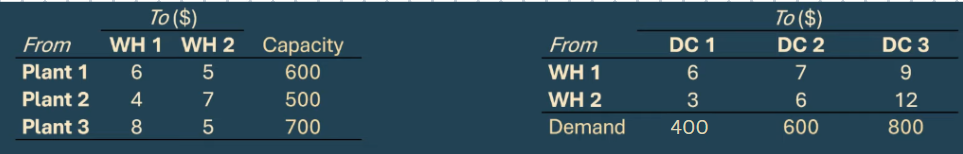

##Additional constraints:
1. Plant 3 can ship directly to DC1 with cost 8
2. Plant 1 can ship to Plant 2 for free
3. Plant 2 capacity to WH 4 is 200
4. Plant 3 must ship atleast 150 units to WH 2
5. WH 4 can not handle more than 1000 units
6. Shipment is not allowed from WH 2 to DC 3
7. DC 3 has demand of 400 which makes it a balanced prolem so Demand = Supply

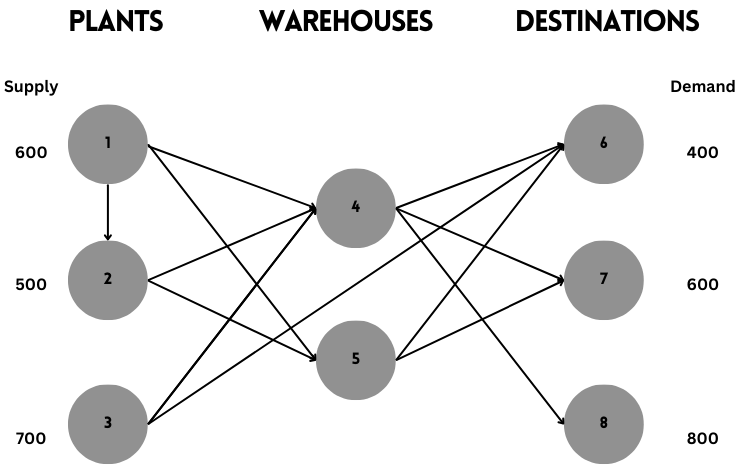

In [2]:
!pip install -q pyomo
!apt-get install -y -qq glpk-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.1 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected pac

In [3]:
from pyomo.environ import *

In [12]:
model = ConcreteModel()

#Decision variables
model.X12 = Var(domain=NonNegativeReals)
model.X14 = Var(domain=NonNegativeReals)
model.X15 = Var(domain=NonNegativeReals)
model.X24 = Var(domain=NonNegativeReals)
model.X25 = Var(domain=NonNegativeReals)
model.X34 = Var(domain=NonNegativeReals)
model.X35 = Var(domain=NonNegativeReals)
model.X36 = Var(domain=NonNegativeReals)
model.X46 = Var(domain=NonNegativeReals)
model.X47 = Var(domain=NonNegativeReals)
model.X48 = Var(domain=NonNegativeReals)
model.X56 = Var(domain=NonNegativeReals)
model.X57 = Var(domain=NonNegativeReals)

#Objective function to minimize cost
model.obj = Objective(
    expr=6*model.X14 + 5*model.X15 + 4*model.X24 + 7*model.X25 + 8*model.X34 + 5*model.X35 + 8*model.X36 +
         6*model.X46 + 7*model.X47 + 9*model.X48 + 3*model.X56 + 6*model.X57,
    sense=minimize
)

#Constraints
model.con1 = Constraint(expr=model.X12 + model.X14 + model.X15 == 600)
model.con2 = Constraint(expr=model.X24 + model.X25 - model.X12 == 500)
model.con3 = Constraint(expr=model.X34 + model.X35 + model.X36 == 700)
model.con4 = Constraint(expr=model.X14 + model.X24 + model.X34 <= 1000)
model.con5 = Constraint(expr=model.X46 + model.X47 + model.X48 <= 1000)
model.con6 = Constraint(expr=model.X15 + model.X25 + model.X35 - model.X56 - model.X57  == 0)
model.con7 = Constraint(expr=model.X46 + model.X56 + model.X36 == 400)
model.con8 = Constraint(expr=model.X47 + model.X57 == 600)
model.con9 = Constraint(expr=model.X48 == 800)
model.con10 = Constraint(expr=model.X24 <= 200)
model.con11 = Constraint(expr=model.X35 >= 150)


#Solve
solver = SolverFactory('glpk', executable='/usr/bin/glpsol')
solver.solve(model)

#Results
print("X14 =", model.X14())
print("X15 =", model.X15())
print("X24 =", model.X24())
print("X25 =", model.X25())
print("X34 =", model.X34())
print("X35 =", model.X35())
print("X46 =", model.X46())
print("X47 =", model.X47())
print("X48 =", model.X48())
print("X56 =", model.X56())
print("X57 =", model.X57())
print("Objective value =", model.obj())


X14 = 600.0
X15 = 0.0
X24 = 200.0
X25 = 300.0
X34 = 0.0
X35 = 300.0
X46 = 0.0
X47 = 0.0
X48 = 800.0
X56 = 0.0
X57 = 600.0
Objective value = 22000.0
